# **Import Libraries**

In [ ]:
# import library
import pandas as pd
import numpy as np
import time

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# **Read Dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnugrahLink26/Data-Science-2022/main/CSV%20File/WA_Fn-UseC_-Telco-Customer-Churn.csv', delimiter=',')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Understanding Data**

The data set includes information about:
* **Customers who left within the last month** – the column is called Churn
* **Demographic** info about customers – gender, age range, and if they have partners and dependents
* **Services** that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# **Data Cleaning**

## Check Duplicate Data

In [ ]:
df.duplicated().sum()

0

There are no duplicate data

## Drop **customerID** column

In [ ]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Check Missing Value

We see that **TotalCharges** data type is object, where it should be an float or integer, so we change it to a numeric and check the missing value

In [ ]:
# Converting Total Charges to a numerical data type.
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We found 11 missing values in TotalCharges. Let's check this data!

In [ ]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We also found that the **tenure** column is 0 for these entries even though the MonthlyCharges column is not empty. Let's check if there are any other 0 values in the tenure column!


In [ ]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Now we found 11 data that has value 0 in **tenure**.

## Handling Missing Value

To handle missing values in TotalCharges column, we fill it with the **mean of TotalCharges values**.

In [ ]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


To handle **tenure** missing value, we decide to delete the rows with missing values in **tenure** columns since there are only 11 rows and deleting them will not affect the data.

In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

Let's check again the missing value!

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now there are no missing data

## Handling Outlier
To handle ourlier, We check the numerical columns (tenure, MonthlyCharges, TotalCharges) and plot it using Box Plot to find is there any outlier data and plot distribution data in Data Visualization so we can use Standardization for these numerical columns

# **Data Visualization**

In [ ]:
# Function to plot composition
def plot_composition(label, value, name, **kwargs):
  # Create subplots: use 'domain' type for Pie subplot
  fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
  fig.add_trace(go.Pie(labels=label, values=value, name=name),
                1, 1)

  # Use `hole` to create a donut-like pie chart
  fig.update_traces(hole=.6, hoverinfo='label+percent+name', textfont_size=16)

  fig.update_layout(
      title_text='{} Composition'.format(name),
      # Add annotations in the center of the donut pies.
      annotations=[dict(text=name, x=0.5, y=0.5, font_size=20, showarrow=False)])
 
  fig.show()

In [ ]:
 # Function to boxplot
 def boxplot(y, text, title, **kwargs): 
  fig = px.box(df, x='Churn', y = y)

  # Update y-axis properties
  fig.update_yaxes(title_text=text, row=1, col=1)
  # Update x-axis properties
  fig.update_xaxes(title_text='Churn', row=1, col=1)

  # Update size and title
  fig.update_layout(autosize=True, width=750, height=600,
      title_font=dict(size=25, family='Courier'),
      title='<b>{} vs Churn</b>'.format(title),)

  fig.show()

In [ ]:
# Function to plot correletation with Churn
def plot_correlation(hue, name, color, **kwargs):  
  sns.set(style="whitegrid")
  plt.figure(figsize=(10,8))
  total = float(len(df['gender']))
  ax = sns.countplot(x='Churn', hue=hue, data=df, palette=color)
  plt.title('Churn Composition Based on {}'.format(name), fontsize=20)
  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y), ha='right', va='center',size=15, 
                  xytext=(0, 8), textcoords='offset points')
  plt.show()

In [ ]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## Churn

In [ ]:
churn_labels = ['No', 'Yes']

plot_composition(churn_labels, df['Churn'].value_counts(), 'Churn')

There are 26.6% churn (Customers who left within the last month)

## Tenure vs Churn

In [ ]:
boxplot('tenure', 'Tenure (Months)', 'Tenure')

* New customers are more likely to churn
* There are outlier in tenure that the churn is yes, so we use Standardization for tenure column

### Distribution

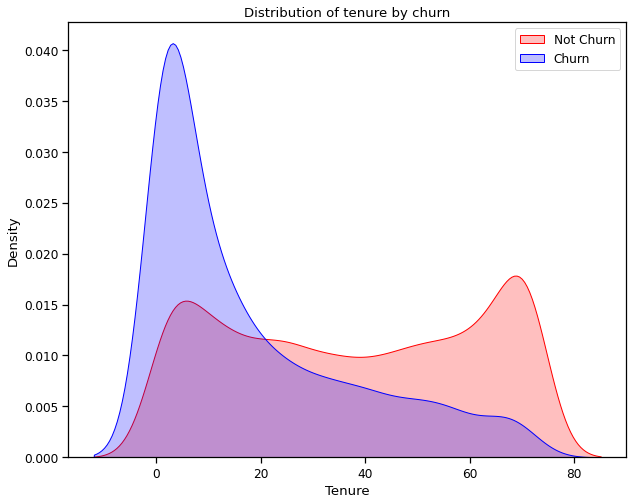

In [ ]:
sns.set_context("notebook",font_scale=1.1)
plt.figure(figsize=(10,8))
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of tenure by churn');

In [ ]:
df.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


## Monthly Charges vs Churn

In [ ]:
boxplot('MonthlyCharges', 'Monthly Charges', 'Monthly Charges')

There are no outlier in MonthlyCharges column

### Distribution

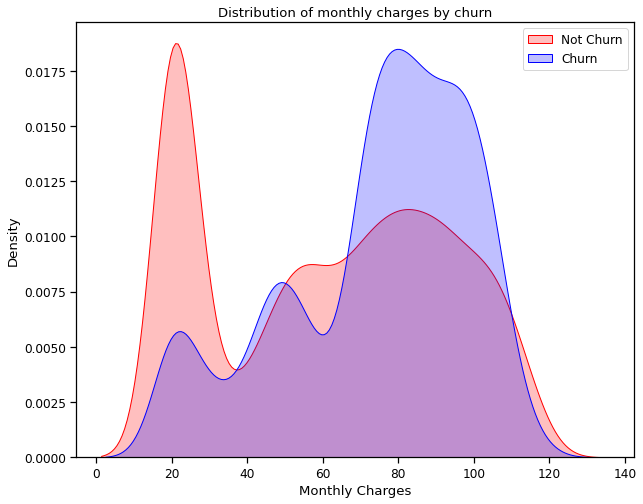

In [ ]:
sns.set_context("notebook",font_scale=1.1)
plt.figure(figsize=(10,8))
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

* Customers with higher Monthly Charges are also more likely to churn
* Because we now there is distribution for MonthlyCharges vs Churn, so we use Standardization for MonthlyCharges column

In [ ]:
df.groupby('Churn')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,61.307408,31.094557,18.25,25.10,64.45,88.475,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.200,118.35


## Total Charges vs Churn

In [ ]:
boxplot('TotalCharges', 'Total Charges', 'Total Charges')

There are outlier in TotalCharges that the churn is yes, so we use Standardization for TotalCharges column

### Distribution

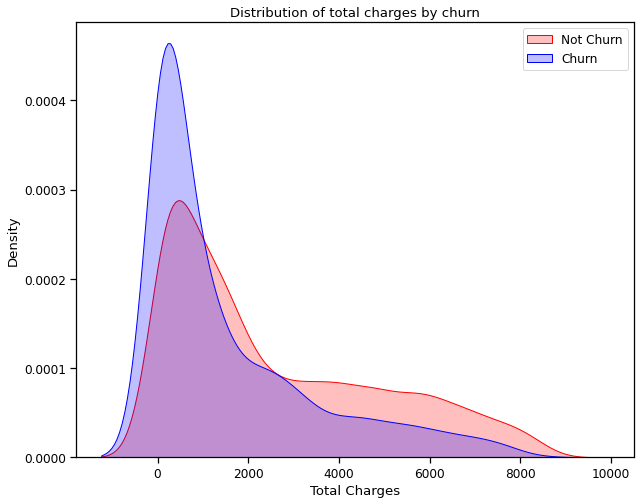

In [ ]:
sns.set_context("notebook",font_scale=1.1)
plt.figure(figsize=(10,8))
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [ ]:
df.groupby('Churn')['TotalCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


## Gender

In [ ]:
gender_labels = ['Male', 'Female']

plot_composition(gender_labels, df['gender'].value_counts(), 'Gender')

### Gender vs Churn

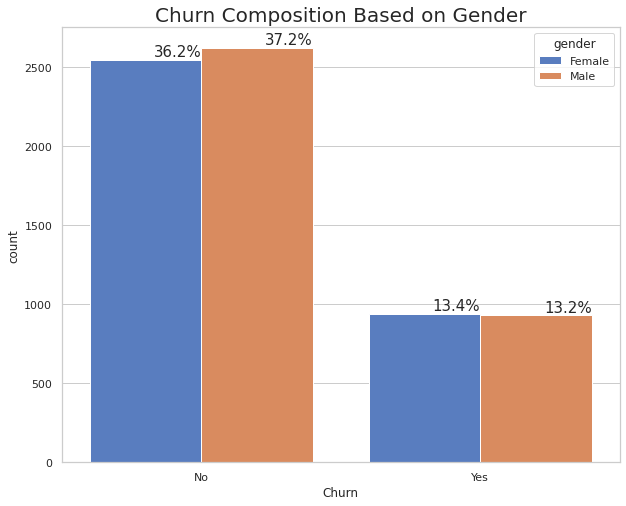

In [ ]:
plot_correlation('gender', 'Gender', 'muted')

There is so little difference in customer percentage/ count who changed the service provider. Both genders behaved similarly when it comes to migrating to another service provider/firm.

## Payment Methods

In [ ]:
paymentmethod_labels = ['Electronic check', 'Mailed check', 
                        'Bank transfer (automatic)', 'Credit card (automatic)']

plot_composition(paymentmethod_labels, df['PaymentMethod'].value_counts(), 'Payment Methods')

### Payment Methods vs Churn

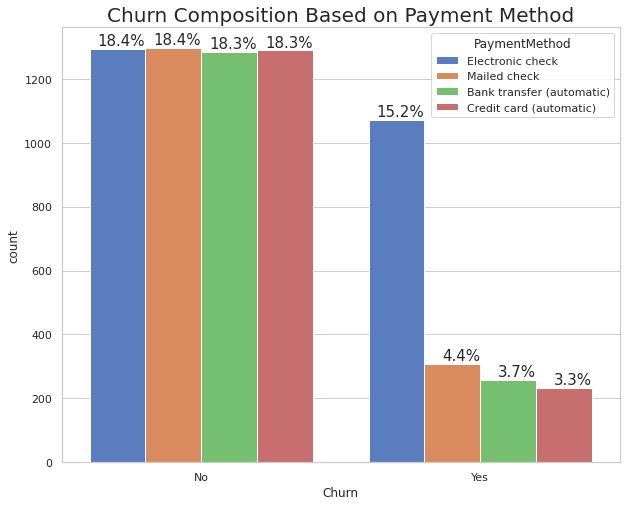

In [ ]:
plot_correlation('PaymentMethod', 'Payment Method', 'muted')

* Major customer churn was having Electronic Check as Payment Method.
* Customers who choose for Credit-Card transfer (automatic) or Bank Transfer (automatic) and Mailed Checks as Payment Method were less likely to churn.

## Contract

In [ ]:
contract_labels = ['Month-to-month', 'One year', 'Two year']

plot_composition(contract_labels, df['Contract'].value_counts(), 'Contract')

### Contract vs Churn

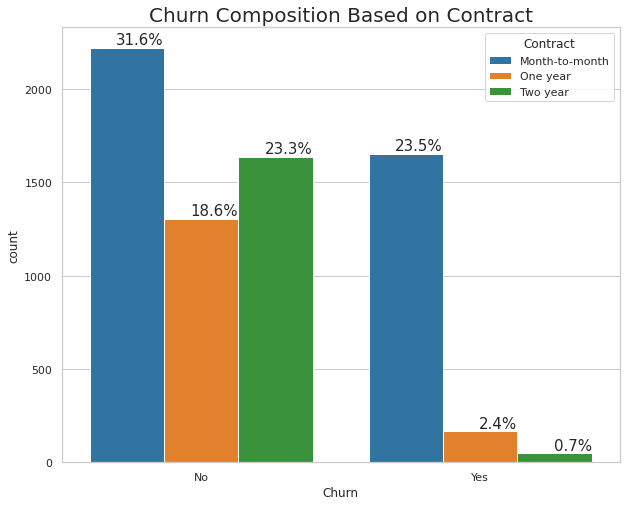

In [ ]:
plot_correlation('Contract', 'Contract', 'tab10')

About 23.5% of the customer with Month-to-Month Contracts choose to churn as compared to 2.4% of customers with One Year Contracts and 0.7% with Two Year Contract

## Phone Service

In [ ]:
phone_labels = ['No', 'Yes']

plot_composition(phone_labels, df['PhoneService'].value_counts(), 'Phone Service')

### Phone Service vs Churn

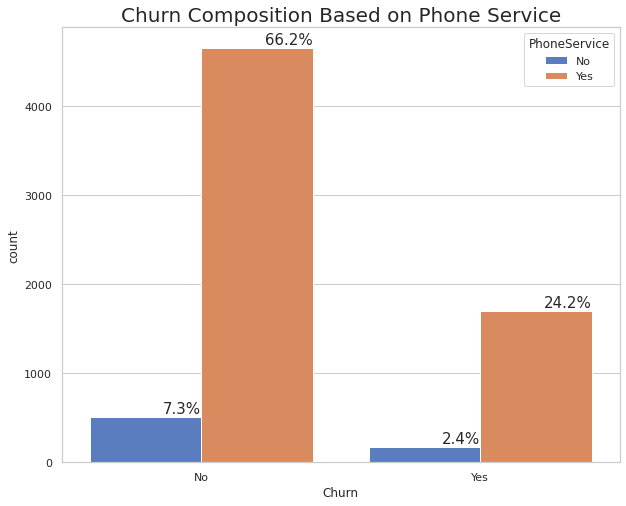

In [ ]:
plot_correlation('PhoneService', 'Phone Service', 'muted')

Very few customers don't have phone service and out of that, about 26.6% of Customers are more likely to churn.

## Internet Service

In [ ]:
internet_labels = ['DSL', 'Fiber optic']

plot_composition(churn_labels, df['InternetService'].value_counts(), 'Internet Service')

### Internet Service vs Churn

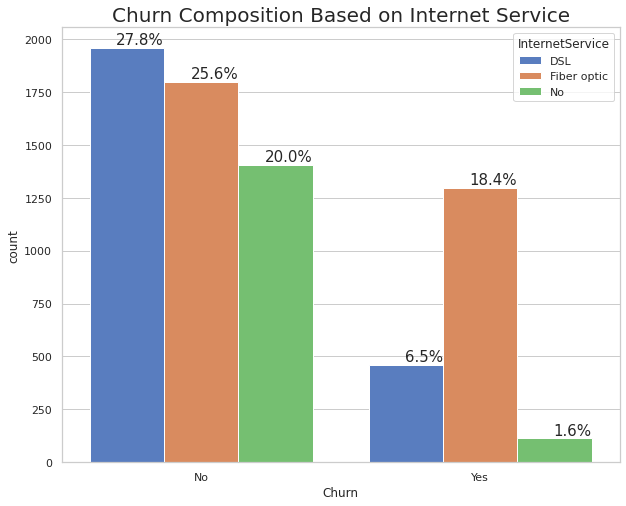

In [ ]:
plot_correlation('InternetService', 'Internet Service', 'muted')

## Multiple Lines

In [ ]:
multiple_labels = ['No', 'Yes', 'No phone sevice']

plot_composition(multiple_labels, df['MultipleLines'].value_counts(), 'Multiple Lines')

### Multiple Lines vs Churn

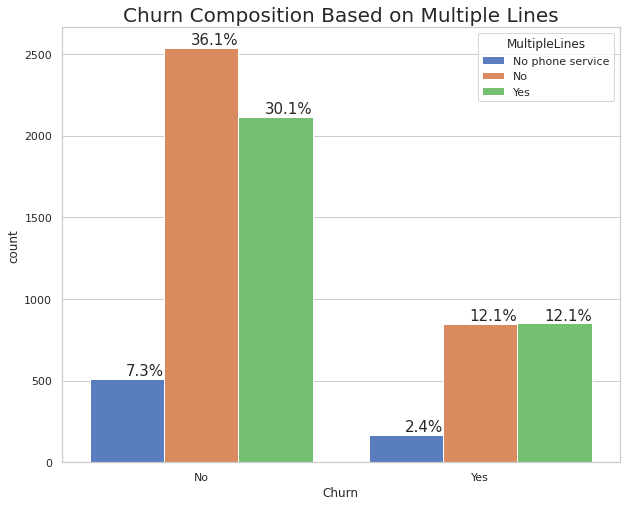

In [ ]:
plot_correlation('MultipleLines', 'Multiple Lines', 'muted')

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have a high churn rate, this might suggest dissatisfaction with this type of internet service.
* Customers having DSL service are the majority in number and have less churn rate compared to Fibre optic service.

## Online Security

In [ ]:
online_labels = ['No', 'Yes', 'No internet sevice']

plot_composition(online_labels, df['OnlineSecurity'].value_counts(), 'Online Security')

### Online Security vs Churn

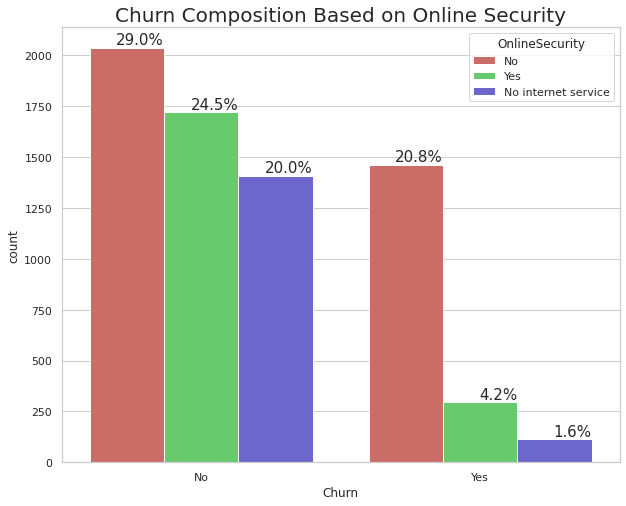

In [ ]:
plot_correlation('OnlineSecurity', 'Online Security', 'hls')

## Tech Support

In [ ]:
tech_labels = ['No', 'Yes', 'No internet sevice']

plot_composition(tech_labels, df['TechSupport'].value_counts(), 'Tech Support')

### Tech Support vs Churn

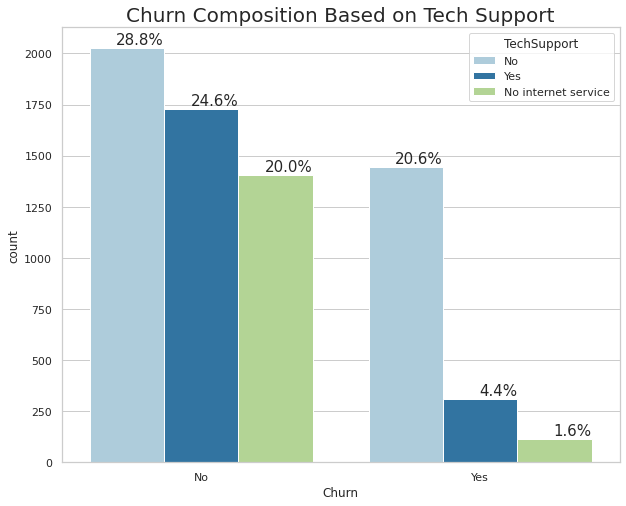

In [ ]:
plot_correlation('TechSupport', 'Tech Support', 'Paired')

## All Dataset Correlation

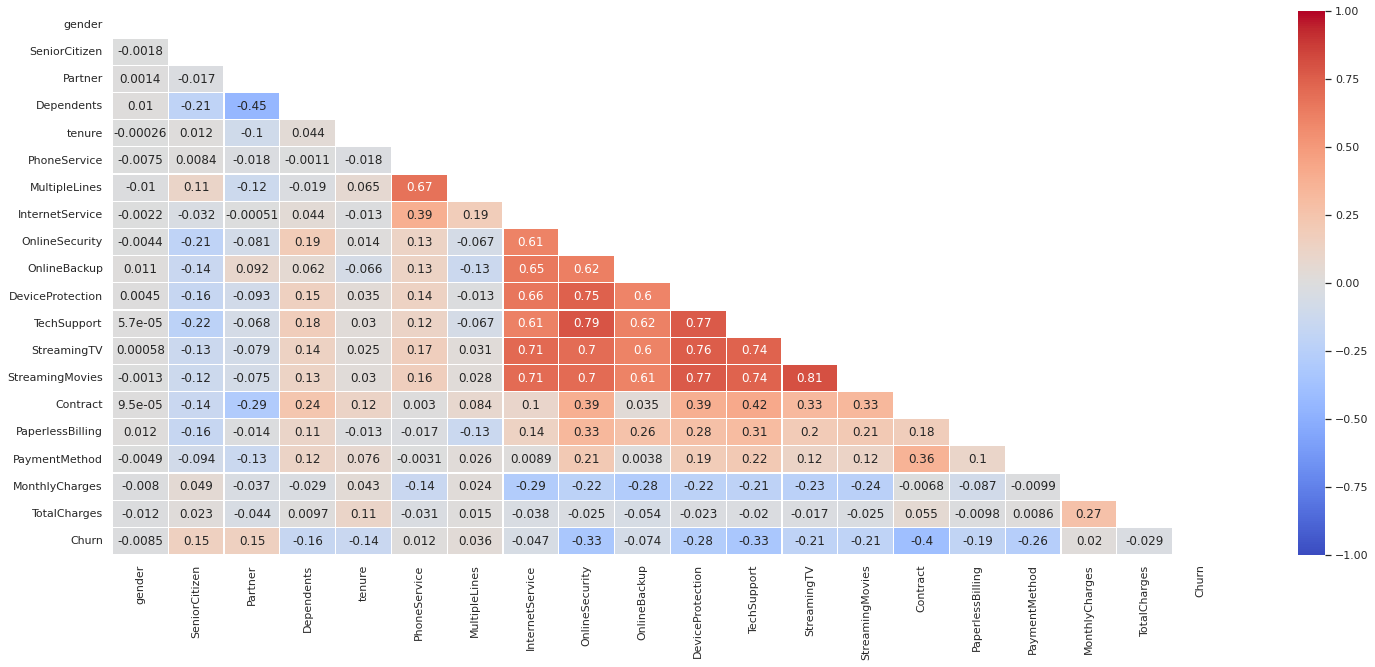

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# **Data Preprocessing**

## Library for Data Preprocessing

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

import warnings
warnings.filterwarnings('ignore')

## Feature Encoding

We use Label Encoding

In [ ]:
def object_to_int(dataframe_series):
  if dataframe_series.dtype=='object':
    dataframe_series = LabelEncoder().fit_transform(dataframe_series)
  return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Correlation Coefficient with **Churn**

In [ ]:
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

## Train Test Split Data

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

## Standardizing Numeric Attributes

We use Standardization for numerical columns (tenure, MonthlyCharges, TotalCharges) because We know the Normal Distribution from Data Visualization and there are outlier in tenure and TotalCharges columns

In [ ]:
# Standardization tenure
X_train['tenure'] = stats.zscore(X_train['tenure'])
X_test['tenure'] = stats.zscore(X_test['tenure'])

# Standardization MonthlyCharges
X_train['MonthlyCharges'] = stats.zscore(X_train['MonthlyCharges'])
X_test['MonthlyCharges'] = stats.zscore(X_test['MonthlyCharges'])

# Standardization TotalCharges
X_train['TotalCharges'] = stats.zscore(X_train['TotalCharges'])
X_test['TotalCharges'] = stats.zscore(X_test['TotalCharges'])

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
983,1,0,0,0,-1.281139,1,2,1,0,0,0,0,0,2,0,1,2,0.726146,-0.970138
6565,1,0,1,0,1.170193,1,2,1,2,2,0,0,2,2,0,1,2,1.381503,1.809078
2212,1,0,0,0,-0.913439,1,0,2,1,1,1,1,1,1,1,0,3,-1.517446,-0.908597
2526,1,0,0,0,-1.281139,1,0,2,1,1,1,1,1,1,0,0,3,-1.520790,-0.999837
2751,0,0,1,1,-0.545739,0,1,0,0,0,0,0,0,0,0,1,3,-1.338561,-0.816253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,1,0,0,0,0.353082,1,0,1,0,0,0,2,0,0,0,1,2,0.313205,0.356802
6532,0,1,0,0,-0.586595,1,0,2,1,1,1,1,1,1,1,0,0,-1.489025,-0.845068
3528,1,0,0,0,-0.668306,1,0,2,1,1,1,1,1,1,0,1,3,-1.510759,-0.857089
943,0,0,1,0,1.619604,0,1,0,2,2,2,2,2,2,2,0,0,0.020635,1.165827


# **Machine Learning Model Evaluations and Predictions**

## Import Packages

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score 

## Logistic Regression

Logistic Regeression Accuracy  : 0.808
Logistic Regeression Precision : 0.756
Logistic Regeression Recall    : 0.736
Logistic Regeression F1-Score  : 0.745

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.74      2110
weighted avg       0.80      0.81      0.80      2110



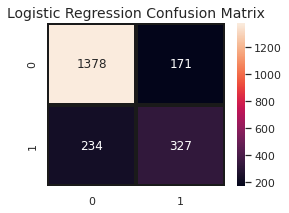

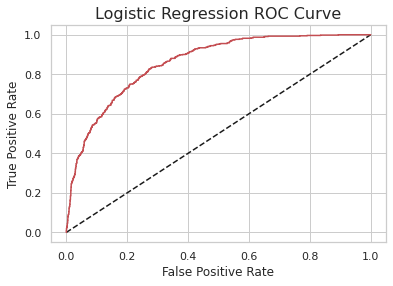


Logistic Regression ROC Score : 0.858

The time of execution of above program is : 0.8878517150878906


In [ ]:
start = time.time()

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# membuat prediksi
lr_pred = lr_model.predict(X_test)
lr_report = classification_report(y_test,lr_pred)

# Calculate Model Performance
print('Logistic Regeression Accuracy  :','{:.3f}'.format(accuracy_score(y_test, lr_pred)))
print('Logistic Regeression Precision :','{:.3f}'.format(precision_score(y_test, lr_pred, average='macro')))  
print('Logistic Regeression Recall    :','{:.3f}'.format(recall_score(y_test, lr_pred, average='macro')))
print('Logistic Regeression F1-Score  :','{:.3f}\n'.format(f1_score(y_test, lr_pred, average='macro')))     
print(lr_report)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix",fontsize=14)
plt.show()
print()

# Logistic Regression ROC Curve
lr_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

print ("\nLogistic Regression ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, lr_pred_prob)))

end = time.time()
lr_time = end-start
print("\nThe time of execution of above program is :", lr_time)

## K Nearest Neighbour

KNN Accuracy  : 0.777
KNN Precision : 0.713
KNN Recall    : 0.672
KNN F1-Score  : 0.685

              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1549
           1       0.61      0.45      0.52       561

    accuracy                           0.78      2110
   macro avg       0.71      0.67      0.69      2110
weighted avg       0.76      0.78      0.76      2110



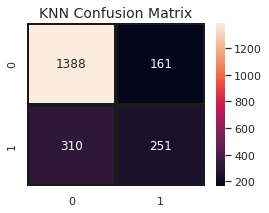

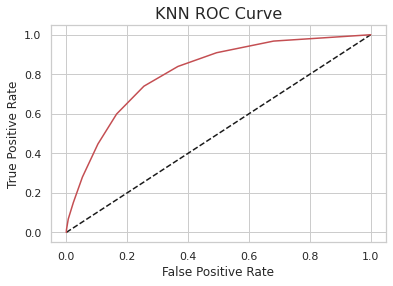


KNN ROC Score : 0.808

The time of execution of above program is : 1.8107905387878418


In [ ]:
start = time.time()

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

# membuat prediksi
knn_pred = knn_model.predict(X_test)
knn_report = classification_report(y_test,knn_pred)

# Calculate Model Performance
print('KNN Accuracy  :','{:.3f}'.format(accuracy_score(y_test, knn_pred)))
print('KNN Precision :','{:.3f}'.format(precision_score(y_test, knn_pred, average='macro')))  
print('KNN Recall    :','{:.3f}'.format(recall_score(y_test, knn_pred, average='macro')))
print('KNN F1-Score  :','{:.3f}\n'.format(f1_score(y_test, knn_pred, average='macro')))   
print(knn_report)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, knn_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN Confusion Matrix",fontsize=14)
plt.show()
print()

# KNN ROC Curve
knn_pred_prob = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='KNN',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve',fontsize=16)
plt.show();

print ("\nKNN ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, knn_pred_prob)))

end = time.time()
knn_time = end-start
print("\nThe time of execution of above program is :", knn_time)

## Decision Tree

Decision Tree Accuracy  : 0.727
Decision Tree Precision : 0.652
Decision Tree Recall    : 0.656
Decision Tree F1-Score  : 0.654

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1549
           1       0.49      0.50      0.50       561

    accuracy                           0.73      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.73      0.73      2110



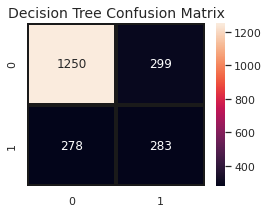

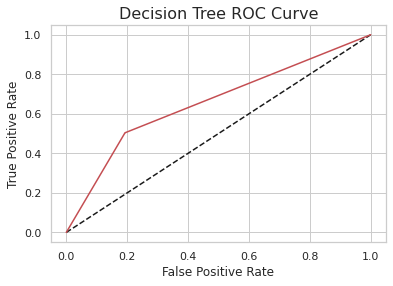


Decision Tree ROC Score : 0.656

The time of execution of above program is : 1.2314503192901611


In [ ]:
start = time.time()

dt_model = DecisionTreeClassifier(criterion="entropy")
dt_model.fit(X_train, y_train)

# membuat prediksi
dt_pred = dt_model.predict(X_test)
dt_report = classification_report(y_test,dt_pred)

# Calculate Model Performance
print('Decision Tree Accuracy  :','{:.3f}'.format(accuracy_score(y_test, dt_pred))) 
print('Decision Tree Precision :','{:.3f}'.format(precision_score(y_test, dt_pred, average='macro')))  
print('Decision Tree Recall    :','{:.3f}'.format(recall_score(y_test, dt_pred, average='macro')))
print('Decision Tree F1-Score  :','{:.3f}\n'.format(f1_score(y_test, dt_pred, average='macro')))    
print(dt_report)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Decision Tree Confusion Matrix",fontsize=14)
plt.show()
print()

# Decision Tree ROC Curve
dt_pred_prob = dt_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, dt_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Decision Tree',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve',fontsize=16)
plt.show();

print ("\nDecision Tree ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, dt_pred_prob)))

end = time.time()
dt_time = end-start
print("\nThe time of execution of above program is :", dt_time)

## Random Forest

Random Forest Accuracy  : 0.814
Random Forest Precision : 0.774
Random Forest Recall    : 0.716
Random Forest F1-Score  : 0.736

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



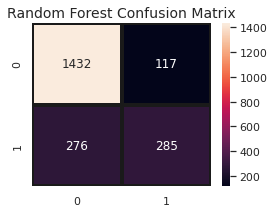

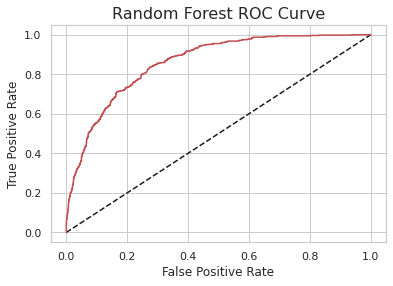


Random Forest ROC Score : 0.860

The time of execution of above program is : 6.3424882888793945


In [ ]:
start = time.time()

rf_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                random_state =50, max_features = "auto",
                                max_leaf_nodes = 30)
rf_model.fit(X_train, y_train)

# membuat prediksi
rf_pred = rf_model.predict(X_test)
rf_report = classification_report(y_test,rf_pred)

# Calculate Model Performance
print('Random Forest Accuracy  :','{:.3f}'.format(accuracy_score(y_test, rf_pred))) 
print('Random Forest Precision :','{:.3f}'.format(precision_score(y_test, rf_pred, average='macro')))  
print('Random Forest Recall    :','{:.3f}'.format(recall_score(y_test, rf_pred, average='macro')))
print('Random Forest F1-Score  :','{:.3f}\n'.format(f1_score(y_test, rf_pred, average='macro')))    
print(rf_report)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, rf_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Random Forest Confusion Matrix",fontsize=14)
plt.show()
print()

# Random Forest ROC Curve
rf_pred_prob = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

print ("\nRandom Forest ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, rf_pred_prob)))

end = time.time()
rf_time = end-start
print("\nThe time of execution of above program is :", rf_time)

## AdaBoost

AdaBoost Accuracy  : 0.806
AdaBoost Precision : 0.755
AdaBoost Recall    : 0.722
AdaBoost F1-Score  : 0.735

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.60       561

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



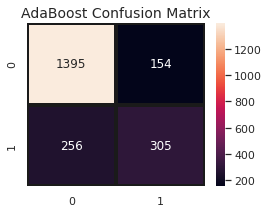

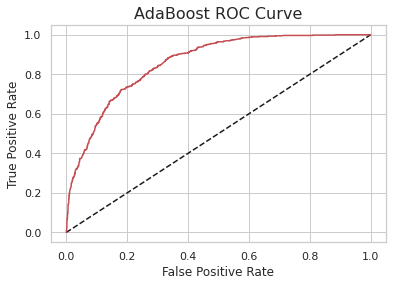


AdaBoost ROC Score : 0.859

The time of execution of above program is : 1.6770424842834473


In [ ]:
start = time.time()

ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)

# membuat prediksi
ab_pred = ab_model.predict(X_test)
ab_report = classification_report(y_test,ab_pred)

# Calculate Model Performance
print('AdaBoost Accuracy  :','{:.3f}'.format(accuracy_score(y_test, ab_pred)))
print('AdaBoost Precision :','{:.3f}'.format(precision_score(y_test, ab_pred, average='macro')))  
print('AdaBoost Recall    :','{:.3f}'.format(recall_score(y_test, ab_pred, average='macro')))
print('AdaBoost F1-Score  :','{:.3f}\n'.format(f1_score(y_test, ab_pred, average='macro')))     
print(ab_report)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, ab_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Confusion Matrix",fontsize=14)
plt.show()
print()

# AdaBoost ROC Curve
ab_pred_prob = ab_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, ab_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='AdaBoost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve',fontsize=16)
plt.show();

print ("\nAdaBoost ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, ab_pred_prob)))

end = time.time()
ab_time = end-start
print("\nThe time of execution of above program is :", ab_time)

## SVC

SVC Accuracy  : 0.808
SVC Precision : 0.766
SVC Recall    : 0.704
SVC F1-Score  : 0.724

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1549
           1       0.70      0.48      0.57       561

    accuracy                           0.81      2110
   macro avg       0.77      0.70      0.72      2110
weighted avg       0.80      0.81      0.80      2110



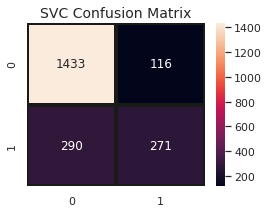

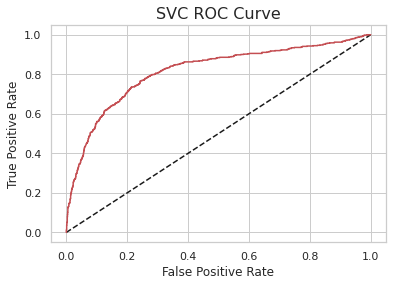


SVC ROC Score : 0.814

The time of execution of above program is : 16.44471573829651


In [ ]:
start = time.time()

svc_model = SVC(gamma='auto', probability=True)
svc_model.fit(X_train, y_train)

# membuat prediksi
svc_pred = svc_model.predict(X_test)
svc_report = classification_report(y_test,svc_pred)

# Calculate Model Performance
print('SVC Accuracy  :','{:.3f}'.format(accuracy_score(y_test, svc_pred))) 
print('SVC Precision :','{:.3f}'.format(precision_score(y_test, svc_pred, average='macro')))  
print('SVC Recall    :','{:.3f}'.format(recall_score(y_test, svc_pred, average='macro')))
print('SVC F1-Score  :','{:.3f}\n'.format(f1_score(y_test, svc_pred, average='macro')))    
print(svc_report)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svc_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVC Confusion Matrix",fontsize=14)
plt.show()
print()

# SVC ROC Curve
svc_pred_prob = svc_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, svc_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='SVC',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve',fontsize=16)
plt.show();

print ("\nSVC ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, svc_pred_prob)))

end = time.time()
svc_time = end-start
print("\nThe time of execution of above program is :", svc_time)

## Gradient Boosting

Gradient Boosting Accuracy  : 0.804
Gradient Boosting Precision : 0.751
Gradient Boosting Recall    : 0.722
Gradient Boosting F1-Score  : 0.734

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.66      0.55      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110



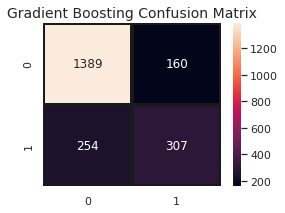

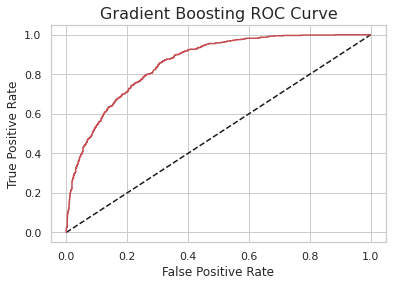


Gradient Boosting ROC Score : 0.857

The time of execution of above program is : 2.7712960243225098


In [ ]:
start = time.time()

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# membuat prediksi
gb_pred = gb_model.predict(X_test)
gb_report = classification_report(y_test,gb_pred)

# Calculate Model Performance
print('Gradient Boosting Accuracy  :','{:.3f}'.format(accuracy_score(y_test, gb_pred))) 
print('Gradient Boosting Precision :','{:.3f}'.format(precision_score(y_test, gb_pred, average='macro')))  
print('Gradient Boosting Recall    :','{:.3f}'.format(recall_score(y_test, gb_pred, average='macro')))
print('Gradient Boosting F1-Score  :','{:.3f}\n'.format(f1_score(y_test, gb_pred, average='macro')))    
print(gb_report)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Confusion Matrix",fontsize=14)
plt.show()
print()

# Gradient Boosting ROC Curve
gb_pred_prob = gb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, gb_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Gradient Boosting',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve',fontsize=16)
plt.show();

print ("\nGradient Boosting ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, gb_pred_prob)))

end = time.time()
gb_time = end-start
print("\nThe time of execution of above program is :", gb_time)

## XG Boost

XG Boost Accuracy  : 0.810
XG Boost Precision : 0.761
XG Boost Recall    : 0.727
XG Boost F1-Score  : 0.740

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.68      0.55      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



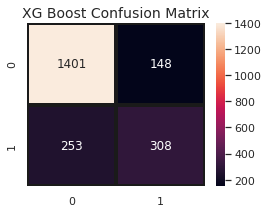

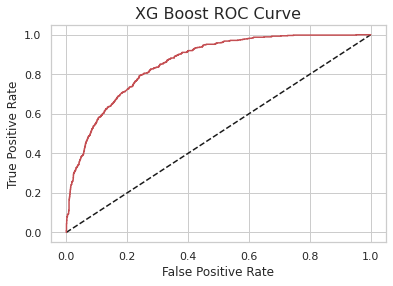

XG Boost ROC Score : 0.859

The time of execution of above program is : 1.967620849609375


In [ ]:
start = time.time()

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# membuat prediksi
xgb_pred = xgb_model.predict(X_test)
xgb_report = classification_report(y_test,xgb_pred)

# Calculate Model Performance
print('XG Boost Accuracy  :','{:.3f}'.format(accuracy_score(y_test, xgb_pred))) 
print('XG Boost Precision :','{:.3f}'.format(precision_score(y_test, xgb_pred, average='macro')))  
print('XG Boost Recall    :','{:.3f}'.format(recall_score(y_test, xgb_pred, average='macro')))
print('XG Boost F1-Score  :','{:.3f}\n'.format(f1_score(y_test, xgb_pred, average='macro')))    
print(xgb_report)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, xgb_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XG Boost Confusion Matrix",fontsize=14)
plt.show()
print()

# XG Boost ROC Curve
xgb_pred_prob = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XG Boost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boost ROC Curve',fontsize=16)
plt.show();

print ("XG Boost ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, xgb_pred_prob)))

end = time.time()
xgb_time = end-start
print("\nThe time of execution of above program is :", xgb_time)

## Execution Time

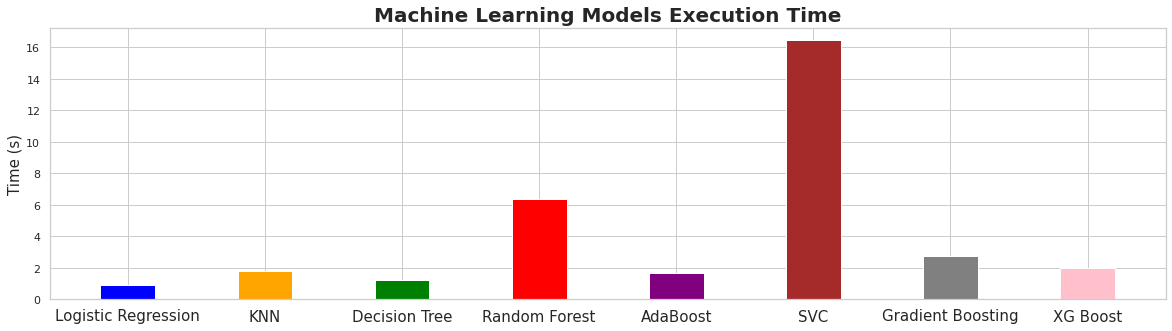

In [ ]:
fig = plt.subplots(figsize =(20, 5))

# Create Data
ml_name = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest',
           'AdaBoost', 'SVC', 'Gradient Boosting', 'XG Boost']
ml_time = [lr_time, knn_time, dt_time, rf_time, 
           ab_time, svc_time, gb_time, xgb_time]
           
color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'gray', 'pink']  
x = np.arange(len(ml_name)) 
width = 0.4    

# Plot Data
plt.bar(x, ml_time, width, color=color)
plt.title("Machine Learning Models Execution Time", fontweight = 'bold', fontsize = 20)
plt.xticks(x, ml_name, fontsize = 15)
plt.ylabel("Time (s)", fontsize = 15)
plt.show()

# **Handling Imbalanced Data Using ADASYN**

In [ ]:
# Handling imbalance data
from imblearn.over_sampling import ADASYN
from collections import Counter

oversampling = ADASYN(random_state=0)

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40, stratify=y)

# Fit the over sampling
X_train_adsyn, y_train_adsyn = oversampling.fit_resample(X_train, y_train)

print("Before over sampling: {}".format(Counter(y_train)))
print("After over sampling: {}".format(Counter(y_train_adsyn)))

Before over sampling: Counter({0: 3614, 1: 1308})
After over sampling: Counter({1: 3731, 0: 3614})


## Logistic Regression

Logistic Regeression Training Accuracy  : 0.775
Logistic Regeression Test Accuracy      : 0.748
Logistic Regeression Precision          : 0.712
Logistic Regeression Recall             : 0.763
Logistic Regeression F1-Score           : 0.718

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110



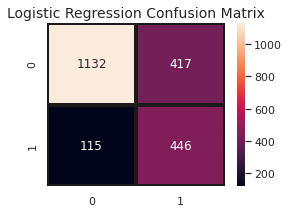

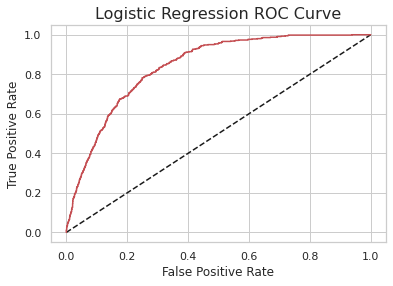


Logistic Regression ROC Score : 0.840

The time of execution of above program is : 1.6616384983062744


In [ ]:
start = time.time()

lr_model = LogisticRegression()
lr_model.fit(X_train_adsyn, y_train_adsyn)

# membuat prediksi
lr_pred_train = lr_model.predict(X_train_adsyn)
lr_pred_test = lr_model.predict(X_test)
lr_report = classification_report(y_test,lr_pred_test)

# Calculate Model Performance
print('Logistic Regeression Training Accuracy  :','{:.3f}'.format(accuracy_score(y_train_adsyn, lr_pred_train)))
print('Logistic Regeression Test Accuracy      :','{:.3f}'.format(accuracy_score(y_test, lr_pred_test)))
print('Logistic Regeression Precision          :','{:.3f}'.format(precision_score(y_test, lr_pred_test, average='macro')))  
print('Logistic Regeression Recall             :','{:.3f}'.format(recall_score(y_test, lr_pred_test, average='macro')))
print('Logistic Regeression F1-Score           :','{:.3f}\n'.format(f1_score(y_test, lr_pred_test, average='macro')))     
print(lr_report)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred_test),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix",fontsize=14)
plt.show()
print()

# Logistic Regression ROC Curve
lr_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

print ("\nLogistic Regression ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, lr_pred_prob)))

end = time.time()
lr_time_adasyn = end-start
print("\nThe time of execution of above program is :", lr_time_adasyn)

## XG Boost

XG Boost Training Accuracy  : 0.842
XG Boost Test Accuracy      : 0.769
XG Boost Precision          : 0.720
XG Boost Recall             : 0.758
XG Boost F1-Score           : 0.731

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1549
           1       0.55      0.73      0.63       561

    accuracy                           0.77      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.77      0.78      2110



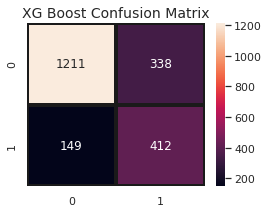

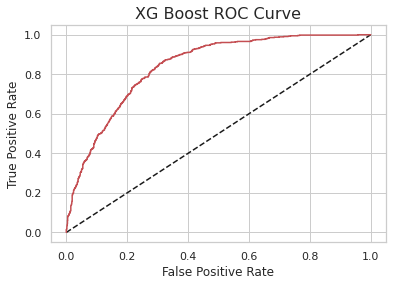

XG Boost ROC Score : 0.840

The time of execution of above program is : 2.2439868450164795


In [ ]:
start = time.time()

xgb_model = XGBClassifier()
xgb_model.fit(X_train_adsyn, y_train_adsyn)

# membuat prediksi
xgb_pred_train = xgb_model.predict(X_train_adsyn)
xgb_pred_test = xgb_model.predict(X_test)
xgb_report = classification_report(y_test,xgb_pred_test)

# Calculate Model Performance
print('XG Boost Training Accuracy  :','{:.3f}'.format(accuracy_score(y_train_adsyn, xgb_pred_train)))
print('XG Boost Test Accuracy      :','{:.3f}'.format(accuracy_score(y_test, xgb_pred_test)))
print('XG Boost Precision          :','{:.3f}'.format(precision_score(y_test, xgb_pred_test, average='macro')))  
print('XG Boost Recall             :','{:.3f}'.format(recall_score(y_test, xgb_pred_test, average='macro')))
print('XG Boost F1-Score           :','{:.3f}\n'.format(f1_score(y_test, xgb_pred_test, average='macro')))    
print(xgb_report)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, xgb_pred_test),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XG Boost Confusion Matrix",fontsize=14)
plt.show()
print()

# XG Boost ROC Curve
xgb_pred_prob = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XG Boost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boost ROC Curve',fontsize=16)
plt.show();

print ("XG Boost ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, xgb_pred_prob)))

end = time.time()
xgb_time_adasyn = end-start
print("\nThe time of execution of above program is :", xgb_time_adasyn)

## AdaBoost

AdaBoost Training Accuracy  : 0.819
AdaBoost Test Accuracy      : 0.753
AdaBoost Precision          : 0.709
AdaBoost Recall             : 0.753
AdaBoost F1-Score           : 0.718

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1549
           1       0.52      0.75      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.75      0.76      2110



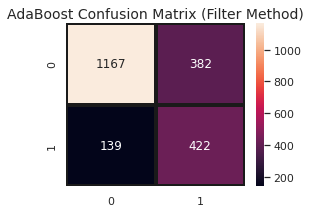

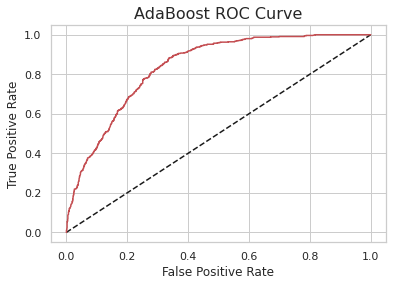


AdaBoost ROC Score : 0.836

The time of execution of above program is : 1.7950408458709717


In [ ]:
start = time.time()

ab_model = AdaBoostClassifier()
ab_model.fit(X_train_adsyn, y_train_adsyn)

# membuat prediksi
ab_pred_train = ab_model.predict(X_train_adsyn)
ab_pred_test = ab_model.predict(X_test)
ab_report = classification_report(y_test,ab_pred_test)

# Calculate Model Performance
print('AdaBoost Training Accuracy  :','{:.3f}'.format(accuracy_score(y_train_adsyn, ab_pred_train)))
print('AdaBoost Test Accuracy      :','{:.3f}'.format(accuracy_score(y_test, ab_pred_test)))
print('AdaBoost Precision          :','{:.3f}'.format(precision_score(y_test, ab_pred_test, average='macro')))  
print('AdaBoost Recall             :','{:.3f}'.format(recall_score(y_test, ab_pred_test, average='macro')))
print('AdaBoost F1-Score           :','{:.3f}\n'.format(f1_score(y_test, ab_pred_test, average='macro')))     
print(ab_report)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, ab_pred_test),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Confusion Matrix (Filter Method)",fontsize=14)
plt.show()
print()

# AdaBoost ROC Curve
ab_pred_prob = ab_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, ab_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='AdaBoost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve',fontsize=16)
plt.show();

print ("\nAdaBoost ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, ab_pred_prob)))

end = time.time()
ab_time_adasyn = end-start
print("\nThe time of execution of above program is :", ab_time_adasyn)

## Execution Time

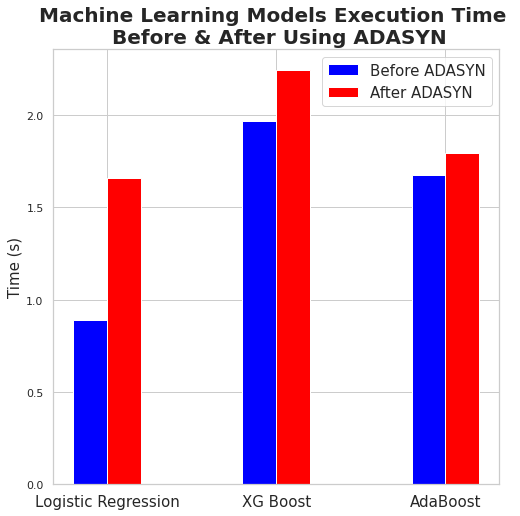

In [ ]:
fig = plt.subplots(figsize =(8, 8))

# Create Data
ml_best_name = ['Logistic Regression', 'XG Boost', 'AdaBoost']
ml_best_time = [lr_time, xgb_time, ab_time]

ml_adasyn_name = ['Before ADASYN', 'After ADASYN']
ml_time_adsyn = [lr_time_adasyn, xgb_time_adasyn, ab_time_adasyn]

x = np.arange(len(ml_best_name)) 
width = 0.2

# Plot Data
plt.bar(x-(width/2), ml_best_time, width, color='blue')
plt.bar(x+(width/2), ml_time_adsyn, width, color='red')
plt.title("Machine Learning Models Execution Time \n Before & After Using ADASYN", fontweight='bold', fontsize=20 )
plt.xticks(x, ml_best_name, fontsize=15)
plt.ylabel("Time (s)", fontsize=15)
plt.legend(ml_adasyn_name, fontsize=15)
plt.show()

# **Feature Selection**

## Filter Method

Before feature selection (7345, 19)
After feature selection (7345, 5)
Score of features
 [1.81750707e+02 6.81116552e-01 6.57366706e+02 7.81590848e+02
 9.98885946e+02 2.79636055e+01 5.39467322e-03 7.47572772e+01
 1.15937503e+03 5.01556000e+02 5.26244531e+02 1.21249747e+03
 5.76240510e+01 5.99584701e+01 2.56688321e+03 6.21743873e+01
 5.09537114e+00 3.45117323e+02 2.07734989e+02]


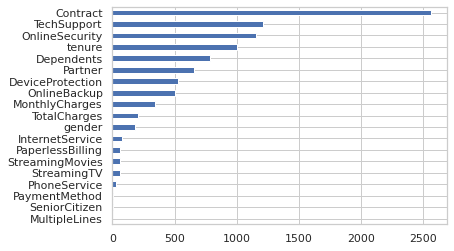

In [ ]:
filter = SelectKBest(f_classif, k=5)
filter.fit(X_train_adsyn, y_train_adsyn)

X_train_filter = filter.transform(X_train_adsyn)
X_test_filter = filter.transform(X_test)

print("Before feature selection", X_train_adsyn.shape)
print("After feature selection", X_train_filter.shape)
print("Score of features\n", filter.scores_)

feature_importance = pd.Series(filter.scores_, index=X_train_adsyn.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

### Logistic Regression

Logistic Regeression Training Accuracy  : 0.757
Logistic Regeression Test Accuracy      : 0.707
Logistic Regeression Precision          : 0.693
Logistic Regeression Recall             : 0.747
Logistic Regeression F1-Score           : 0.685

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1549
           1       0.47      0.83      0.60       561

    accuracy                           0.71      2110
   macro avg       0.69      0.75      0.68      2110
weighted avg       0.80      0.71      0.72      2110



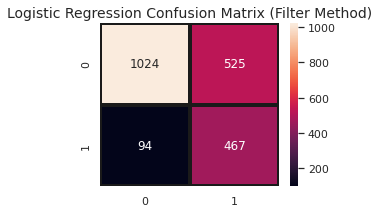

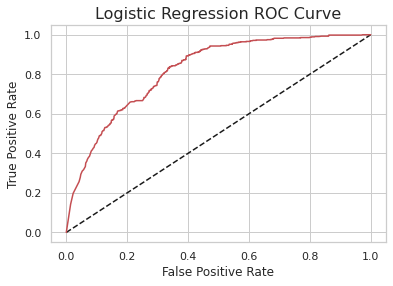


Logistic Regression ROC Score : 0.820

The time of execution of above program is : 1.3195092678070068


In [ ]:
start = time.time()

lr_model_filter = LogisticRegression()
lr_model_filter.fit(X_train_filter, y_train_adsyn)

# membuat prediksi
lr_pred_train = lr_model_filter.predict(X_train_filter)
lr_pred_test = lr_model_filter.predict(X_test_filter)
lr_report_filter = classification_report(y_test,lr_pred_test)

# Calculate Model Performance
print('Logistic Regeression Training Accuracy  :','{:.3f}'.format(accuracy_score(y_train_adsyn, lr_pred_train)))
print('Logistic Regeression Test Accuracy      :','{:.3f}'.format(accuracy_score(y_test, lr_pred_test)))
print('Logistic Regeression Precision          :','{:.3f}'.format(precision_score(y_test, lr_pred_test, average='macro')))  
print('Logistic Regeression Recall             :','{:.3f}'.format(recall_score(y_test, lr_pred_test, average='macro')))
print('Logistic Regeression F1-Score           :','{:.3f}\n'.format(f1_score(y_test, lr_pred_test, average='macro')))     
print(lr_report_filter)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred_test),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix (Filter Method)",fontsize=14)
plt.show()
print()

# Logistic Regression ROC Curve
lr_pred_prob = lr_model_filter.predict_proba(X_test_filter)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

print ("\nLogistic Regression ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, lr_pred_prob)))

end = time.time()
lr_time_filter = end-start
print("\nThe time of execution of above program is :", lr_time_filter)

### XG Boost

XG Boost Training Accuracy  : 0.788
XG Boost Test Accuracy      : 0.726
XG Boost Precision          : 0.681
XG Boost Recall             : 0.720
XG Boost F1-Score           : 0.688

              precision    recall  f1-score   support

           0       0.87      0.73      0.80      1549
           1       0.49      0.71      0.58       561

    accuracy                           0.73      2110
   macro avg       0.68      0.72      0.69      2110
weighted avg       0.77      0.73      0.74      2110



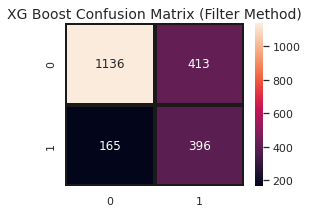

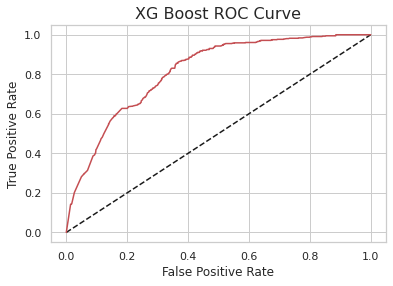


XG Boost ROC Score : 0.814

The time of execution of above program is : 1.4544391632080078


In [ ]:
start = time.time()

xgb_model_filter = XGBClassifier()
xgb_model_filter.fit(X_train_filter, y_train_adsyn)

# membuat prediksi
xgb_pred_train = xgb_model_filter.predict(X_train_filter)
xgb_pred_test = xgb_model_filter.predict(X_test_filter)
xgb_report_filter = classification_report(y_test,xgb_pred_test)

# Calculate Model Performance
print('XG Boost Training Accuracy  :','{:.3f}'.format(accuracy_score(y_train_adsyn, xgb_pred_train)))
print('XG Boost Test Accuracy      :','{:.3f}'.format(accuracy_score(y_test, xgb_pred_test)))
print('XG Boost Precision          :','{:.3f}'.format(precision_score(y_test, xgb_pred_test, average='macro')))  
print('XG Boost Recall             :','{:.3f}'.format(recall_score(y_test, xgb_pred_test, average='macro')))
print('XG Boost F1-Score           :','{:.3f}\n'.format(f1_score(y_test, xgb_pred_test, average='macro')))     
print(xgb_report_filter)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, xgb_pred_test),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XG Boost Confusion Matrix (Filter Method)",fontsize=14)
plt.show()
print()

# XG Boost ROC Curve
xgb_pred_prob = xgb_model_filter.predict_proba(X_test_filter)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XG Boost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boost ROC Curve',fontsize=16)
plt.show();

print ("\nXG Boost ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, xgb_pred_prob)))

end = time.time()
xgb_time_filter = end-start
print("\nThe time of execution of above program is :", xgb_time_filter)

### AdaBoost

AdaBoost Training Accuracy  : 0.764
AdaBoost Test Accuracy      : 0.699
AdaBoost Precision          : 0.687
AdaBoost Recall             : 0.739
AdaBoost F1-Score           : 0.677

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1549
           1       0.46      0.83      0.59       561

    accuracy                           0.70      2110
   macro avg       0.69      0.74      0.68      2110
weighted avg       0.79      0.70      0.72      2110



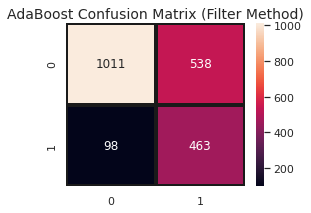

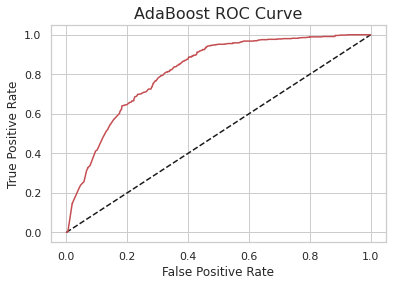


AdaBoost ROC Score : 0.815

The time of execution of above program is : 1.5918385982513428


In [ ]:
start = time.time()

ab_model_filter = AdaBoostClassifier()
ab_model_filter.fit(X_train_filter, y_train_adsyn)

# membuat prediksi
ab_pred_train = ab_model_filter.predict(X_train_filter)
ab_pred_test = ab_model_filter.predict(X_test_filter)
ab_report_filter = classification_report(y_test,ab_pred_test)

# Calculate Model Performance
print('AdaBoost Training Accuracy  :','{:.3f}'.format(accuracy_score(y_train_adsyn, ab_pred_train)))
print('AdaBoost Test Accuracy      :','{:.3f}'.format(accuracy_score(y_test, ab_pred_test)))
print('AdaBoost Precision          :','{:.3f}'.format(precision_score(y_test, ab_pred_test, average='macro')))  
print('AdaBoost Recall             :','{:.3f}'.format(recall_score(y_test, ab_pred_test, average='macro')))
print('AdaBoost F1-Score           :','{:.3f}\n'.format(f1_score(y_test, ab_pred_test, average='macro')))     
print(ab_report_filter)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, ab_pred_test),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Confusion Matrix (Filter Method)",fontsize=14)
plt.show()
print()

# AdaBoost ROC Curve
ab_pred_prob = ab_model_filter.predict_proba(X_test_filter)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, ab_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='AdaBoost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve',fontsize=16)
plt.show();

print ("\nAdaBoost ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, ab_pred_prob)))

end = time.time()
ab_time_filter = end-start
print("\nThe time of execution of above program is :", ab_time_filter)

## Wrapper Method (RFE)

### Logistic Regression

Before feature selection (7345, 19)
After feature selection (7345, 5)
Score of features [ 1  2  4  1 13  3  8 10  1  6  9  1 14  5  1 11  7 12 15]


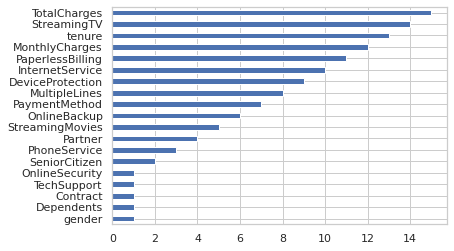

In [ ]:
lr_model_wrapper = LogisticRegression()

wrapper = RFE(lr_model_wrapper, n_features_to_select=5)
wrapper.fit(X_train_adsyn, y_train_adsyn)

X_train_wrapper = wrapper.transform(X_train_adsyn)
X_test_wrapper = wrapper.transform(X_test)

print("Before feature selection", X_train_adsyn.shape)
print("After feature selection", X_train_wrapper.shape)
print("Score of features", wrapper.ranking_)

feature_importance = pd.Series(wrapper.ranking_, index=X_train_adsyn.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

Logistic Regeression Training Accuracy  : 0.765
Logistic Regeression Test Accuracy      : 0.709
Logistic Regeression Precision          : 0.682
Logistic Regeression Recall             : 0.729
Logistic Regeression F1-Score           : 0.681

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1549
           1       0.47      0.77      0.59       561

    accuracy                           0.71      2110
   macro avg       0.68      0.73      0.68      2110
weighted avg       0.78      0.71      0.73      2110



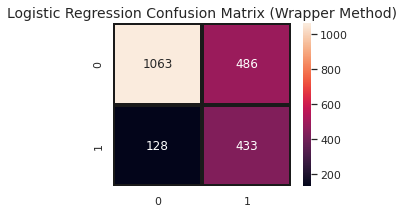

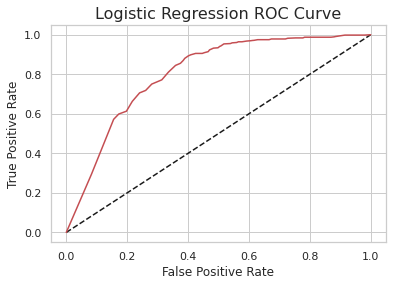


Logistic Regression ROC Score : 0.805

The time of execution of above program is : 1.5250294208526611


In [ ]:
start = time.time()

lr_model_wrapper=LogisticRegression()
lr_model_wrapper.fit(X_train_wrapper, y_train_adsyn)

# membuat prediksi
lr_pred_train = lr_model_wrapper.predict(X_train_wrapper)
lr_pred_test = lr_model_wrapper.predict(X_test_wrapper)
lr_report_wrapper = classification_report(y_test,lr_pred_test)

# Calculate Model Performance
print('Logistic Regeression Training Accuracy  :','{:.3f}'.format(accuracy_score(y_train_adsyn, lr_pred_train)))
print('Logistic Regeression Test Accuracy      :','{:.3f}'.format(accuracy_score(y_test, lr_pred_test)))
print('Logistic Regeression Precision          :','{:.3f}'.format(precision_score(y_test, lr_pred_test, average='macro')))  
print('Logistic Regeression Recall             :','{:.3f}'.format(recall_score(y_test, lr_pred_test, average='macro')))
print('Logistic Regeression F1-Score           :','{:.3f}\n'.format(f1_score(y_test, lr_pred_test, average='macro')))     
print(lr_report_wrapper)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred_test),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix (Wrapper Method)",fontsize=14)
plt.show()
print()

# Logistic Regression ROC Curve
lr_pred_prob = lr_model_wrapper.predict_proba(X_test_wrapper)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

print ("\nLogistic Regression ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, lr_pred_prob)))

end = time.time()
lr_time_wrapper = end-start
print("\nThe time of execution of above program is :", lr_time_wrapper)

### XG Boost

Before feature selection (7345, 19)
After feature selection (7345, 5)
Score of features [ 3 10  2  1  9  7  8  1  1  4  6  1 14 12  1 15  5 11 13]


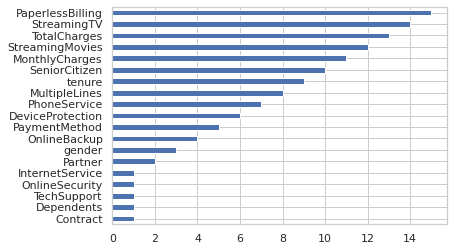

In [ ]:
xgb_model_wrapper = XGBClassifier()

wrapper = RFE(xgb_model_wrapper, n_features_to_select=5)
wrapper.fit(X_train_adsyn, y_train_adsyn)

X_train_wrapper = wrapper.transform(X_train_adsyn)
X_test_wrapper = wrapper.transform(X_test)

print("Before feature selection", X_train_adsyn.shape)
print("After feature selection", X_train_wrapper.shape)
print("Score of features", wrapper.ranking_)

feature_importance = pd.Series(wrapper.ranking_, index=X_train_adsyn.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

XG Boost Training Accuracy  : 0.797
XG Boost Test Accuracy      : 0.768
XG Boost Precision          : 0.713
XG Boost Recall             : 0.742
XG Boost F1-Score           : 0.723

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1549
           1       0.55      0.68      0.61       561

    accuracy                           0.77      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.77      0.78      2110



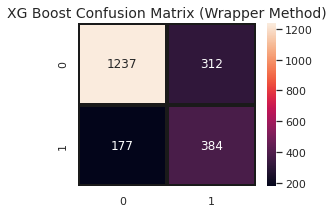

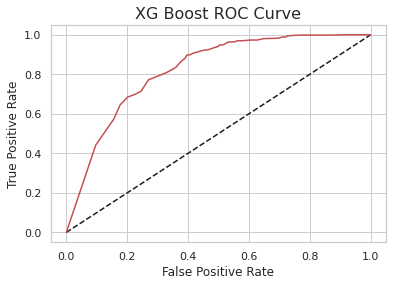


XG Boost ROC Score : 0.822

The time of execution of above program is : 1.6126139163970947


In [ ]:
start = time.time()

xgb_model_wrapper=XGBClassifier()
xgb_model_wrapper.fit(X_train_wrapper, y_train_adsyn)

# membuat prediksi
xgb_pred_train = xgb_model_wrapper.predict(X_train_wrapper)
xgb_pred_test = xgb_model_wrapper.predict(X_test_wrapper)
xgb_report_wrapper = classification_report(y_test,xgb_pred_test)

# Calculate Model Performance
print('XG Boost Training Accuracy  :','{:.3f}'.format(accuracy_score(y_train_adsyn, xgb_pred_train)))
print('XG Boost Test Accuracy      :','{:.3f}'.format(accuracy_score(y_test, xgb_pred_test)))
print('XG Boost Precision          :','{:.3f}'.format(precision_score(y_test, xgb_pred_test, average='macro')))  
print('XG Boost Recall             :','{:.3f}'.format(recall_score(y_test, xgb_pred_test, average='macro')))
print('XG Boost F1-Score           :','{:.3f}\n'.format(f1_score(y_test, xgb_pred_test, average='macro')))     
print(xgb_report_wrapper)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, xgb_pred_test),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XG Boost Confusion Matrix (Wrapper Method)",fontsize=14)
plt.show()
print()

# XG Boost ROC Curve
xgb_pred_prob = xgb_model_wrapper.predict_proba(X_test_wrapper)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XG Boost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boost ROC Curve',fontsize=16)
plt.show();

print ("\nXG Boost ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, xgb_pred_prob)))

end = time.time()
xgb_time_wrapper = end-start
print("\nThe time of execution of above program is :", xgb_time_wrapper)

### AdaBoost

Before feature selection (7345, 19)
After feature selection (7345, 5)
Score of features [13 12 15 11  4  3  9  1  1 10  1  7  8  5  2 14  6  1  1]


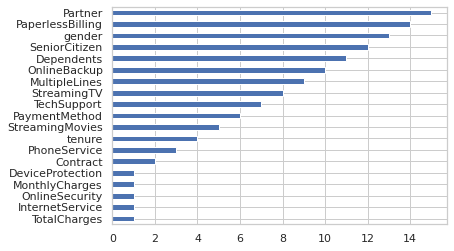

In [ ]:
ab_model_wrapper = AdaBoostClassifier()

wrapper = RFE(ab_model_wrapper, n_features_to_select=5)
wrapper.fit(X_train_adsyn, y_train_adsyn)

X_train_wrapper = wrapper.transform(X_train_adsyn)
X_test_wrapper = wrapper.transform(X_test)

print("Before feature selection", X_train_adsyn.shape)
print("After feature selection", X_train_wrapper.shape)
print("Score of features", wrapper.ranking_)

feature_importance = pd.Series(wrapper.ranking_, index=X_train_adsyn.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

AdaBoost Training Accuracy  : 0.785
AdaBoost Test Accuracy      : 0.741
AdaBoost Precision          : 0.699
AdaBoost Recall             : 0.743
AdaBoost F1-Score           : 0.706

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1549
           1       0.51      0.75      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.74      0.75      2110



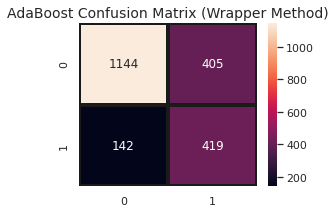

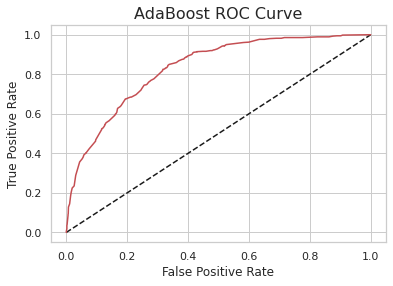


AdaBoost ROC Score : 0.831

The time of execution of above program is : 0.974236249923706


In [ ]:
start = time.time()

ab_model_wrapper = AdaBoostClassifier()
ab_model_wrapper.fit(X_train_wrapper, y_train_adsyn)

# membuat prediksi
ab_pred_train = ab_model_wrapper.predict(X_train_wrapper)
ab_pred_test = ab_model_wrapper.predict(X_test_wrapper)
ab_report_wrapper = classification_report(y_test,ab_pred_test)

# Calculate Model Performance
print('AdaBoost Training Accuracy  :','{:.3f}'.format(accuracy_score(y_train_adsyn, ab_pred_train)))
print('AdaBoost Test Accuracy      :','{:.3f}'.format(accuracy_score(y_test, ab_pred_test)))
print('AdaBoost Precision          :','{:.3f}'.format(precision_score(y_test, ab_pred_test, average='macro')))  
print('AdaBoost Recall             :','{:.3f}'.format(recall_score(y_test, ab_pred_test, average='macro')))
print('AdaBoost F1-Score           :','{:.3f}\n'.format(f1_score(y_test, ab_pred_test, average='macro')))     
print(ab_report_wrapper)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, ab_pred_test),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Confusion Matrix (Wrapper Method)",fontsize=14)
plt.show()
print()

# AdaBoost ROC Curve
ab_pred_prob = ab_model_wrapper.predict_proba(X_test_wrapper)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, ab_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='AdaBoost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve',fontsize=16)
plt.show();

print ("\nAdaBoost ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, ab_pred_prob)))

end = time.time()
ab_time_wrapper = end-start
print("\nThe time of execution of above program is :", ab_time_wrapper)

## Embedded Method

### Logistic Regression

Before feature selection (7345, 19)
After feature selection (7345, 9)

Coef
 [-2.65514952e-01 -1.10124717e-01 -3.33673381e-01 -3.85291317e-01
 -3.33762358e-02 -2.33717939e-01 -4.41152274e-02  1.04783047e-01
 -5.00896829e-01 -2.47689174e-01 -2.34400113e-01 -5.39116900e-01
 -1.10896118e-02 -1.66164376e-02 -7.44643366e-01 -4.15040617e-02
  2.05934097e-01  2.40925939e-02  2.84194376e-04]
Treshold 0.21457179972414656


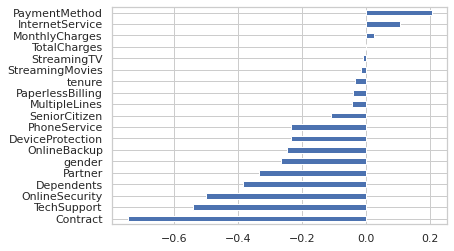

In [ ]:
lr_model_importance = LogisticRegression()
lr_model_importance_feature = SelectFromModel(lr_model_importance)

lr_model_importance_feature.fit(X_train_adsyn, y_train_adsyn)

X_train_importance = lr_model_importance_feature.transform(X_train_adsyn)
X_test_importance = lr_model_importance_feature.transform(X_test)

print("Before feature selection", X_train_adsyn.shape)
print("After feature selection", X_train_importance.shape)
print("\nCoef\n",lr_model_importance_feature.estimator_.coef_[0])
print("Treshold",lr_model_importance_feature.threshold_)

feature_importance = pd.Series(lr_model_importance_feature.estimator_.coef_[0], index=X_train_adsyn.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

Logistic Regeression Training Accuracy  : 0.767
Logistic Regeression Test Accuracy      : 0.713
Logistic Regeression Precision          : 0.691
Logistic Regeression Recall             : 0.743
Logistic Regeression F1-Score           : 0.688

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1549
           1       0.48      0.81      0.60       561

    accuracy                           0.71      2110
   macro avg       0.69      0.74      0.69      2110
weighted avg       0.79      0.71      0.73      2110



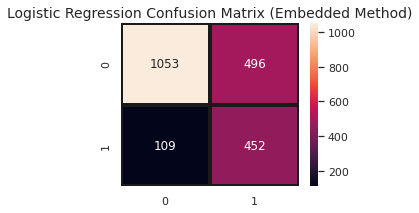

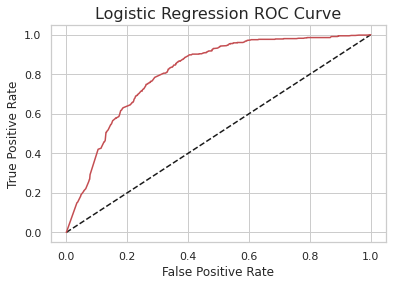


Logistic Regression ROC Score : 0.810

The time of execution of above program is : 0.6750311851501465


In [ ]:
start = time.time()

lr_model_importance=LogisticRegression()
lr_model_importance.fit(X_train_importance, y_train_adsyn)

# membuat prediksi
lr_pred_train = lr_model_importance.predict(X_train_importance)
lr_pred_test = lr_model_importance.predict(X_test_importance)
lr_report_importance = classification_report(y_test,lr_pred_test)

# Calculate Model Performance
print('Logistic Regeression Training Accuracy  :','{:.3f}'.format(accuracy_score(y_train_adsyn, lr_pred_train)))
print('Logistic Regeression Test Accuracy      :','{:.3f}'.format(accuracy_score(y_test, lr_pred_test)))
print('Logistic Regeression Precision          :','{:.3f}'.format(precision_score(y_test, lr_pred_test, average='macro')))  
print('Logistic Regeression Recall             :','{:.3f}'.format(recall_score(y_test, lr_pred_test, average='macro')))
print('Logistic Regeression F1-Score           :','{:.3f}\n'.format(f1_score(y_test, lr_pred_test, average='macro')))     
print(lr_report_importance)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred_test),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix (Embedded Method)",fontsize=14)
plt.show()
print()

# Logistic Regression ROC Curve
lr_pred_prob = lr_model_importance.predict_proba(X_test_importance)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

print ("\nLogistic Regression ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, lr_pred_prob)))

end = time.time()
lr_time_importance = end-start
print("\nThe time of execution of above program is :", lr_time_importance)

### XG Boost

Before feature selection (7345, 19)
After feature selection (7345, 6)

Coef
 [0.02881002 0.02528318 0.07234668 0.09236559 0.02224866 0.02312074
 0.02053202 0.06818417 0.0675844  0.03821265 0.02698886 0.0593055
 0.01168503 0.01564313 0.35407507 0.0018588  0.03396378 0.01778228
 0.02000945]
Treshold 0.05263158


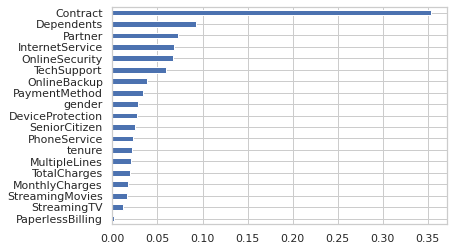

In [ ]:
xgb_model_importance = XGBClassifier()
xgb_importance = SelectFromModel(xgb_model_importance)

xgb_importance.fit(X_train_adsyn, y_train_adsyn)

X_train_importance = xgb_importance.transform(X_train_adsyn)
X_test_importance = xgb_importance.transform(X_test)

print("Before feature selection", X_train_adsyn.shape)
print("After feature selection", X_train_importance.shape)
print("\nCoef\n",xgb_importance.estimator_.feature_importances_)
print("Treshold",xgb_importance.threshold_)

feature_importance = pd.Series(xgb_importance.estimator_.feature_importances_, index=X_train_adsyn.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

XG Boost Training Accuracy  : 0.798
XG Boost Test Accuracy      : 0.760
XG Boost Precision          : 0.706
XG Boost Recall             : 0.738
XG Boost F1-Score           : 0.716

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1549
           1       0.54      0.69      0.60       561

    accuracy                           0.76      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.76      0.77      2110



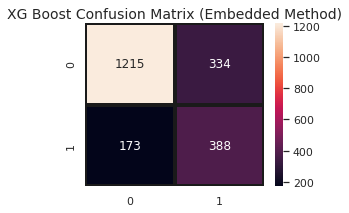

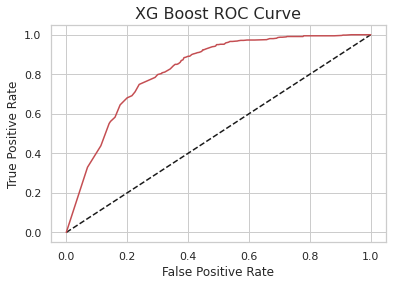


XG Boost ROC Score : 0.822

The time of execution of above program is : 0.8831377029418945


In [ ]:
start = time.time()

xgb_model_importance=XGBClassifier()
xgb_model_importance.fit(X_train_importance, y_train_adsyn)

# membuat prediksi
xgb_pred_train = xgb_model_importance.predict(X_train_importance)
xgb_pred_test = xgb_model_importance.predict(X_test_importance)
xgb_report_importance = classification_report(y_test,xgb_pred_test)

# Calculate Model Performance
print('XG Boost Training Accuracy  :','{:.3f}'.format(accuracy_score(y_train_adsyn, xgb_pred_train)))
print('XG Boost Test Accuracy      :','{:.3f}'.format(accuracy_score(y_test, xgb_pred_test)))
print('XG Boost Precision          :','{:.3f}'.format(precision_score(y_test, xgb_pred_test, average='macro')))  
print('XG Boost Recall             :','{:.3f}'.format(recall_score(y_test, xgb_pred_test, average='macro')))
print('XG Boost F1-Score           :','{:.3f}\n'.format(f1_score(y_test, xgb_pred_test, average='macro')))     
print(xgb_report_importance)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, xgb_pred_test),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XG Boost Confusion Matrix (Embedded Method)",fontsize=14)
plt.show()
print()

# XG Boost ROC Curve
xgb_pred_prob = xgb_model_importance.predict_proba(X_test_importance)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XG Boost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boost ROC Curve',fontsize=16)
plt.show();

print ("\nXG Boost ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, xgb_pred_prob)))

end = time.time()
xgb_time_importance = end-start
print("\nThe time of execution of above program is :", xgb_time_importance)

### AdaBoost

Before feature selection (7345, 19)
After feature selection (7345, 9)

Coef
 [0.02 0.02 0.   0.02 0.06 0.06 0.02 0.1  0.1  0.06 0.04 0.06 0.02 0.02
 0.08 0.   0.02 0.24 0.06]
Treshold 0.05263157894736842


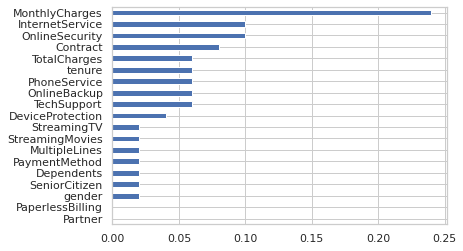

In [ ]:
ab_model_importance = AdaBoostClassifier()
ab_model_importance_feature = SelectFromModel(ab_model_importance)

ab_model_importance_feature.fit(X_train_adsyn, y_train_adsyn)

X_train_importance = ab_model_importance_feature.transform(X_train_adsyn)
X_test_importance = ab_model_importance_feature.transform(X_test)

print("Before feature selection", X_train_adsyn.shape)
print("After feature selection", X_train_importance.shape)
print("\nCoef\n",ab_model_importance_feature.estimator_.feature_importances_)
print("Treshold",ab_model_importance_feature.threshold_)

feature_importance = pd.Series(ab_model_importance_feature.estimator_.feature_importances_, index=X_train_adsyn.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

AdaBoost Training Accuracy  : 0.811
AdaBoost Test Accuracy      : 0.747
AdaBoost Precision          : 0.714
AdaBoost Recall             : 0.767
AdaBoost F1-Score           : 0.719

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



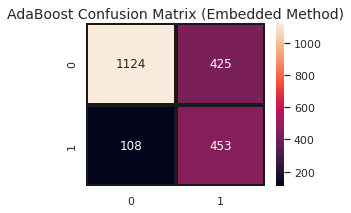

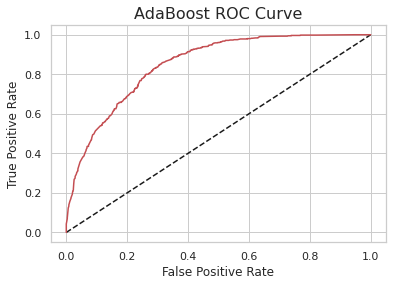


AdaBoost ROC Score : 0.849

The time of execution of above program is : 1.153979778289795


In [ ]:
start = time.time()

ab_model_importance = AdaBoostClassifier()
ab_model_importance.fit(X_train_importance, y_train_adsyn)

# membuat prediksi
ab_pred_train = ab_model_importance.predict(X_train_importance)
ab_pred_test = ab_model_importance.predict(X_test_importance)
ab_report_importance = classification_report(y_test,ab_pred_test)

# Calculate Model Performance
print('AdaBoost Training Accuracy  :','{:.3f}'.format(accuracy_score(y_train_adsyn, ab_pred_train)))
print('AdaBoost Test Accuracy      :','{:.3f}'.format(accuracy_score(y_test, ab_pred_test)))
print('AdaBoost Precision          :','{:.3f}'.format(precision_score(y_test, ab_pred_test, average='macro')))  
print('AdaBoost Recall             :','{:.3f}'.format(recall_score(y_test, ab_pred_test, average='macro')))
print('AdaBoost F1-Score           :','{:.3f}\n'.format(f1_score(y_test, ab_pred_test, average='macro')))     
print(ab_report_importance)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, ab_pred_test),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Confusion Matrix (Embedded Method)",fontsize=14)
plt.show()
print()

# AdaBoost ROC Curve
ab_pred_prob = ab_model_importance.predict_proba(X_test_importance)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, ab_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='AdaBoost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve',fontsize=16)
plt.show();

print ("\nAdaBoost ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, ab_pred_prob)))

end = time.time()
ab_time_importance = end-start
print("\nThe time of execution of above program is :", ab_time_importance)

## Execution Time

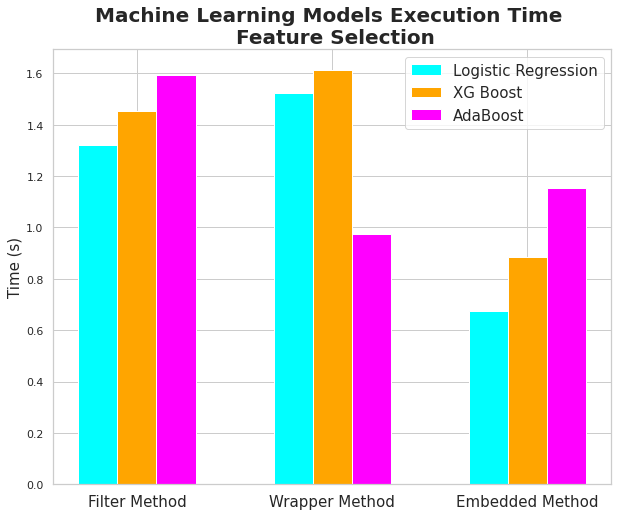

In [ ]:
fig = plt.subplots(figsize =(10, 8))

# Create Data
ml_best_name = ['Logistic Regression', 'XG Boost', 'AdaBoost']
ml_feature = ['Filter Method', 'Wrapper Method', 'Embedded Method']

lr_time_fs = [lr_time_filter, lr_time_wrapper, lr_time_importance]
xgb_time_fs = [xgb_time_filter, xgb_time_wrapper, xgb_time_importance]
ab_time_fs = [ab_time_filter, ab_time_wrapper, ab_time_importance]

x = np.arange(len(ml_best_name)) 
width = 0.2

# Plot Data
plt.bar(x-width, lr_time_fs, width, color='cyan')
plt.bar(x, xgb_time_fs, width, color='orange')
plt.bar(x+width, ab_time_fs, width, color='magenta')
plt.title("Machine Learning Models Execution Time \n Feature Selection", fontweight ='bold', fontsize = 20)
plt.xticks(x, ml_feature, fontsize = 15)
plt.ylabel("Time (s)", fontsize = 15)
plt.legend(ml_best_name, fontsize = 15)
plt.show()

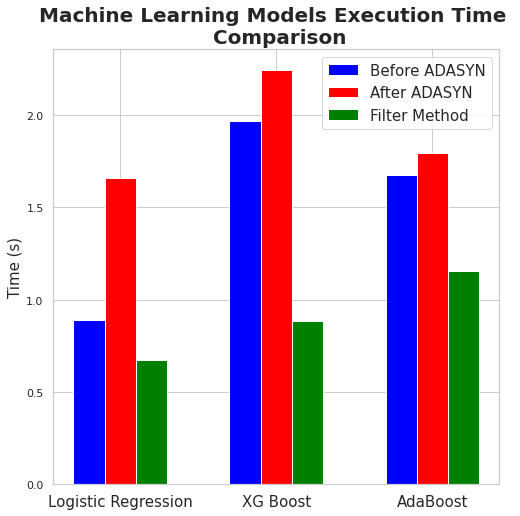

In [ ]:
fig = plt.subplots(figsize =(8, 8))

# Create Data
ml_best_name = ['Logistic Regression', 'XG Boost', 'AdaBoost']
ml_best_time = [lr_time, xgb_time, ab_time]

ml_adasyn_filter = ['Before ADASYN', 'After ADASYN', 'Filter Method']
ml_time_adsyn = [lr_time_adasyn, xgb_time_adasyn, ab_time_adasyn]

ml_time_importance = [lr_time_importance, xgb_time_importance, ab_time_importance]

x = np.arange(len(ml_best_name))
width = 0.2

# Plot Data
plt.bar(x-width, ml_best_time, width, color='blue')
plt.bar(x, ml_time_adsyn, width, color='red')
plt.bar(x+width, ml_time_importance, width, color='green')
plt.title("Machine Learning Models Execution Time \n Comparison", fontweight='bold', fontsize=20 )
plt.xticks(x, ml_best_name, fontsize=15)
plt.ylabel("Time (s)", fontsize=15)
plt.legend(ml_adasyn_filter, fontsize=15)
plt.show()

# **Hyperparameter Tuning**

## Logistics Regression

### Cross  Validation

In [ ]:
cv_score = cross_val_score(lr_model, X, y, cv=10, scoring='recall')
print(cv_score)
print()
print("Average of accuracy using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(cv_score.mean(), cv_score.std()))

[0.54010695 0.51336898 0.52150538 0.60427807 0.51871658 0.51871658
 0.57754011 0.51871658 0.52941176 0.56149733]

Average of accuracy using CV 10 fold (0.54039) and the standard deviation (0.02920)


### Grid Search CV & Tuned Model

LogisticRegression(C=0.1, solver='newton-cg')

Logistic Regression Accuracy  : 0.737
Logistic Regression Precision : 0.711
Logistic Regression Recall    : 0.766
Logistic Regression F1-Score  : 0.711

              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1549
           1       0.50      0.83      0.63       561

    accuracy                           0.74      2110
   macro avg       0.71      0.77      0.71      2110
weighted avg       0.81      0.74      0.75      2110



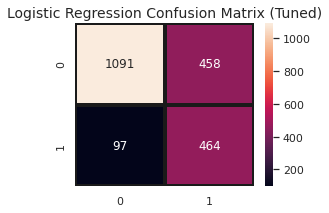

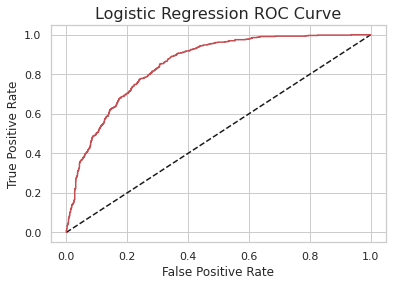


Logistic Regression ROC Score : 0.848

The time of execution of above program is : 37.569942235946655


In [ ]:
start = time.time()

grid_values = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
              'penalty' : ['l1', 'l2'],
              'C' : [0.01, 0.1, 1, 10, 100]}

# Run a Grid Search CV over the hyperparameters
grid_objt_lr = GridSearchCV(lr_model, param_grid = grid_values, cv=10)

# Fit the model on the training data
grid_objt_lr.fit(X_train_importance, y_train_adsyn)

# show the best estimator that we have choosed
print(grid_objt_lr.best_estimator_)

# Predict Result
lr_pred_tuned = grid_objt_lr.best_estimator_.predict(X_test_importance)
lr_report_tuned = classification_report(y_test,lr_pred_tuned)

print('\nLogistic Regression Accuracy  :','{:.3f}'.format(accuracy_score(y_test, lr_pred_tuned))) 
print('Logistic Regression Precision :','{:.3f}'.format(precision_score(y_test, lr_pred_tuned, average='macro')))  
print('Logistic Regression Recall    :','{:.3f}'.format(recall_score(y_test, lr_pred_tuned, average='macro')))
print('Logistic Regression F1-Score  :','{:.3f}\n'.format(f1_score(y_test, lr_pred_tuned, average='macro')))    
print(lr_report_tuned)

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred_tuned),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix (Tuned)",fontsize=14)
plt.show()
print()

# Logistic Regression ROC Curve
lr_prob_tuned = grid_objt_lr.best_estimator_.predict_proba(X_test_importance)[:,1]

fpr_rf, tpr_rf, thresholds = roc_curve(y_test, lr_prob_tuned)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

print ("\nLogistic Regression ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, lr_prob_tuned)))

end = time.time()
lr_time_tuning = end-start
print("\nThe time of execution of above program is :", lr_time_tuning)

## XG Boost

### Cross Validation

In [ ]:
cv_score = cross_val_score(xgb_model, X, y, cv=10, scoring='recall')
print(cv_score)
print()
print("Average of accuracy using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(cv_score.mean(), cv_score.std()))

[0.57219251 0.52406417 0.51612903 0.57219251 0.5026738  0.5026738
 0.56149733 0.5026738  0.48128342 0.52941176]

Average of accuracy using CV 10 fold (0.52648) and the standard deviation (0.03045)


### Grid Search CV & Tuned Model

XG Boost Accuracy  : 0.756
XG Boost Precision : 0.699
XG Boost Recall    : 0.724
XG Boost F1-Score  : 0.707

              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1549
           1       0.53      0.66      0.59       561

    accuracy                           0.76      2110
   macro avg       0.70      0.72      0.71      2110
weighted avg       0.78      0.76      0.76      2110



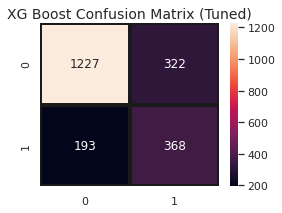

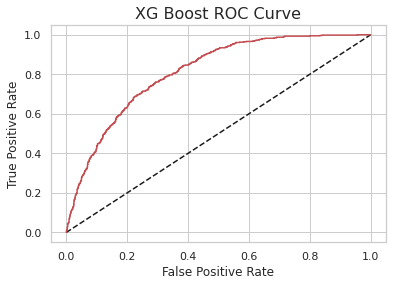


XG Boost ROC Score : 0.811

The time of execution of above program is : 211.5425841808319


In [ ]:
start = time.time()

grid_values = {'max_depth': [2, 3, 5, 10, 20],
              'booster': ["gbtree", "gblinear","dart"]}

# Run a Grid Search CV over the hyperparameters
grid_objt_xgb = GridSearchCV(xgb_model, param_grid = grid_values, cv=10)

# Fit the model on the training data
grid_objt_xgb.fit(X_train_importance, y_train_adsyn)

# show the best estimator that we have choosed
grid_objt_xgb.best_estimator_

# Predict Result
xgb_pred_tuned = grid_objt_xgb.best_estimator_.predict(X_test_importance)
xgb_report_tuned = classification_report(y_test,xgb_pred_tuned)

print('XG Boost Accuracy  :','{:.3f}'.format(accuracy_score(y_test, xgb_pred_tuned))) 
print('XG Boost Precision :','{:.3f}'.format(precision_score(y_test, xgb_pred_tuned, average='macro')))  
print('XG Boost Recall    :','{:.3f}'.format(recall_score(y_test, xgb_pred_tuned, average='macro')))
print('XG Boost F1-Score  :','{:.3f}\n'.format(f1_score(y_test, xgb_pred_tuned, average='macro')))  
print(xgb_report_tuned)  

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, xgb_pred_tuned),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XG Boost Confusion Matrix (Tuned)",fontsize=14)
plt.show()
print()

# XG Boost ROC Curve
xgb_prob_tuned = grid_objt_xgb.best_estimator_.predict_proba(X_test_importance)[:,1]

fpr_rf, tpr_rf, thresholds = roc_curve(y_test, xgb_prob_tuned)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='XG Boost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boost ROC Curve',fontsize=16)
plt.show();

print ("\nXG Boost ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, xgb_prob_tuned)))

end = time.time()
xgb_time_tuning = end-start
print("\nThe time of execution of above program is :", xgb_time_tuning)

## AdaBoost

### Cross Validation

In [ ]:
cv_score = cross_val_score(ab_model, X, y, cv=10, scoring='recall')
print(cv_score)
print()
print("Average of accuracy using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(cv_score.mean(), cv_score.std()))

[0.56684492 0.50802139 0.51075269 0.59893048 0.5026738  0.54545455
 0.5828877  0.43850267 0.51336898 0.55614973]

Average of accuracy using CV 10 fold (0.53236) and the standard deviation (0.04475)


### Grid Search CV & Tuned Model

AdaBoost Accuracy  : 0.747
AdaBoost Precision : 0.714
AdaBoost Recall    : 0.767
AdaBoost F1-Score  : 0.719

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1549
           1       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



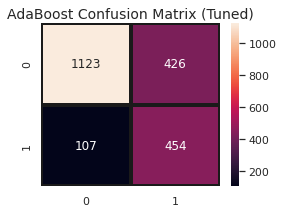

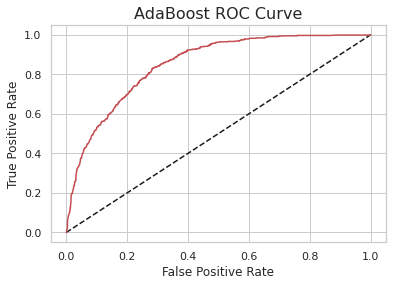


AdaBoost ROC Score : 0.849

The time of execution of above program is : 93.92844009399414


In [ ]:
start = time.time()

grid_values = {"n_estimators": [100, 200],
              "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.5]}

# Run a Grid Search CV over the hyperparameters
grid_objt_ab = GridSearchCV(ab_model, param_grid=grid_values, cv=10)

# Fit the model on the training data
grid_objt_ab.fit(X_train_importance, y_train_adsyn)

# show the best estimator that we have choosed
grid_objt_ab.best_estimator_

# Predict Result
ab_pred_tuned = grid_objt_ab.best_estimator_.predict(X_test_importance)
ab_report_tuned = classification_report(y_test,ab_pred_tuned)

print('AdaBoost Accuracy  :','{:.3f}'.format(accuracy_score(y_test, ab_pred_tuned))) 
print('AdaBoost Precision :','{:.3f}'.format(precision_score(y_test, ab_pred_tuned, average='macro')))  
print('AdaBoost Recall    :','{:.3f}'.format(recall_score(y_test, ab_pred_tuned, average='macro')))
print('AdaBoost F1-Score  :','{:.3f}\n'.format(f1_score(y_test, ab_pred_tuned, average='macro'))) 
print(ab_report_tuned)   

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, ab_pred_tuned),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Confusion Matrix (Tuned)",fontsize=14)
plt.show()
print()

# AdaBoost ROC Curve
ab_pred_tuned = grid_objt_ab.best_estimator_.predict_proba(X_test_importance)[:,1]

fpr_ab, tpr_ab, thresholds = roc_curve(y_test, ab_pred_tuned)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_ab, tpr_ab, label='AdaBoost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve',fontsize=16)
plt.show();

print ("\nAdaBoost ROC Score :", '{:.3f}'.format(roc_auc_score(y_test, ab_pred_tuned)))

end = time.time()
ab_time_tuning = end-start
print("\nThe time of execution of above program is :", ab_time_tuning)

## Execution Time

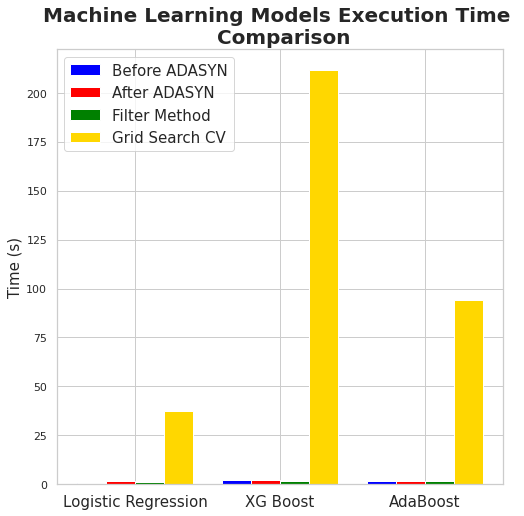

In [ ]:
fig = plt.subplots(figsize =(8, 8))

# Create Data
ml_best_name = ['Logistic Regression', 'XG Boost', 'AdaBoost']
ml_best_time = [lr_time, xgb_time, ab_time]

ml_adasyn_filter_tuning = ['Before ADASYN', 'After ADASYN', 'Filter Method', 'Grid Search CV']
ml_time_adsyn = [lr_time_adasyn, xgb_time_adasyn, ab_time_adasyn]

ml_time_filter = [lr_time_filter, xgb_time_filter, ab_time_filter]
ml_time_tuning = [lr_time_tuning, xgb_time_tuning, ab_time_tuning]

x = np.arange(len(ml_best_name))
width = 0.2

# Plot Data
plt.bar(x-(3*width/2), ml_best_time, width, color='blue')
plt.bar(x-(width/2), ml_time_adsyn, width, color='red')
plt.bar(x+(width/2), ml_time_filter, width, color='green')
plt.bar(x+(3*width/2), ml_time_tuning, width, color='gold')
plt.title("Machine Learning Models Execution Time \n Comparison", fontweight='bold', fontsize=20 )
plt.xticks(x, ml_best_name, fontsize=15)
plt.ylabel("Time (s)", fontsize=15)
plt.legend(ml_adasyn_filter_tuning, fontsize=15)
plt.show()

# **Explainable AI**

In [ ]:
!pip install shap

In [ ]:
import shap

## **With Handling Imbalanced dataset**

In [ ]:
clf = LogisticRegression(C=0.1, solver='newton-cg')
clf.fit(X_train, y_train)

explainer = shap.LinearExplainer(clf, X_train)
shap_values = explainer.shap_values(X_test)
print('Expected Values',explainer.expected_value)

Expected Values -1.5885525133764369


The above metric of **expected value is -1.59** will be used as **base value**. The value above the base value will predict the the customers who is churn (target = 1) and vice versa (target = 0)

The features in **red** one push the prediction to predict the customers who is churn and **blue** one push the prediction to predict otherwise.

In [ ]:
# Evaluation
y_predict_train = clf.predict(X_train)
y_predict_test = clf.predict(X_test)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8033319788703779
Testing Accuracy: 0.8109004739336493
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



In [ ]:
y_test_pd = pd.DataFrame(y_test,columns=['Churn'])
y_test_pd.head()

,Churn
0,0
1,0
2,0
3,1
4,0


In [ ]:
y_pred_test_pd = pd.DataFrame(y_predict_test, columns=['Result'])
y_pred_test_pd.head()

,Result
0,0
1,0
2,0
3,1
4,1


In [ ]:
X_test = X_test.reset_index(drop=True)
y_test = y_test_pd.reset_index(drop=True)

In [ ]:
prediction = y_test
prediction['result'] = y_pred_test_pd
prediction['Summarize'] = prediction['result'] + prediction['Churn']
prediction[prediction['Summarize'] == 0].head()

,Churn,result,Summarize
0,0,0,0
1,0,0,0
2,0,0,0
5,0,0,0
7,0,0,0


In [ ]:
prediction[prediction['Summarize'] == 2]

,Churn,result,Summarize
3,1,1,2
6,1,1,2
11,1,1,2
22,1,1,2
32,1,1,2
...,...,...,...
2071,1,1,2
2073,1,1,2
2074,1,1,2
2093,1,1,2


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[2071,:],
                X_test.iloc[2107,:])